# ベイズの基礎
## ベルヌーイ分布
尤度及びパラメータの事前分布を以下のように定める．
$$
p(x | \mu) = \mu^x (1 - \mu)^{1 - x} \\
p(\mu) = \text{Beta}(\mu | a, b)
$$

このとき，パラメータの事後分布は以下のようになる．
$$
p(\mu | x) = \text{Beta}(\mu | a + x, b + 1 - x)
$$

データが$n$個与えられた時のパラメータの事後分布は以下のようになる．
$$
p(\mu | x_1, \cdots, x_n) = \text{Beta}(\mu | a + \sum_{i=1}^n x_i, b + n - \sum_{i=1}^n x_i)
$$

期待値は
$$
\mathbb{E}[\mu] = \frac{a + \sum_{i=1}^n x_i}{a + b + n}
$$

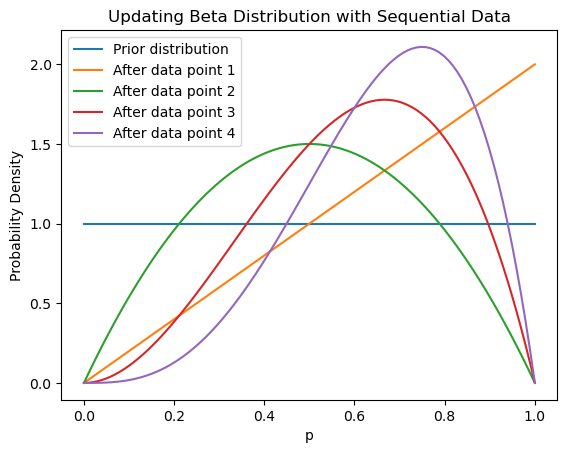

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist

# ベータ分布のパラメータを更新する関数
def update_beta_parameters(alpha_param, beta_param, data):
    return alpha_param + sum(data), beta_param + len(data) - sum(data)

# 初期パラメータ (これは一様分布を意味する)
alpha_param = 1
beta_param = 1

# 逐次的に与えられるデータの例 (1: 成功, 0: 失敗)
data_stream = [1, 0, 1 , 1]

# パラメータと分布をプロットするための準備
x = np.linspace(0, 1, 100)

# 初期の事前分布をプロット
plt.plot(x, beta_dist.pdf(x, alpha_param, beta_param), label='Prior distribution')

# データポイントごとにパラメータを更新
for i, data_point in enumerate(data_stream):
    # 新しいデータ点でパラメータを更新
    alpha_param, beta_param = update_beta_parameters(alpha_param, beta_param, [data_point])
    
    # 更新された分布をプロット
    plt.plot(x, beta_dist.pdf(x, alpha_param, beta_param), label=f'After data point {i+1}')

# グラフ表示設定
plt.title('Updating Beta Distribution with Sequential Data')
plt.xlabel('p')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [5]:
print(f'Final alpha parameter: {alpha_param}')
print(f'Final beta parameter: {beta_param}')

Final alpha parameter: 4
Final beta parameter: 2


## ポアソン分布
尤度及びパラメータの事前分布を以下のように定める．
$$
p(x | \lambda) = \frac{\lambda^x}{x!} \exp{(-\lambda)} \\
p(\lambda) = \text{Ga}(\lambda | a, b)
$$

このとき，パラメータの事後分布は以下のようになる．
$$
p(\lambda | x) = \text{Ga}(\lambda | a + \sum_{i=1}^n x_i, b + n)
$$

データが$n$個与えられた時のパラメータの事後分布は以下のようになる．
$$
p(\lambda | x_1, \cdots, x_n) = \text{Ga}(\lambda | a + \sum_{i=1}^n x_i, b + n)
$$

期待値は
$$
\mathbb{E}[\lambda] = \frac{a + \sum_{i=1}^n x_i}{b + n}
$$

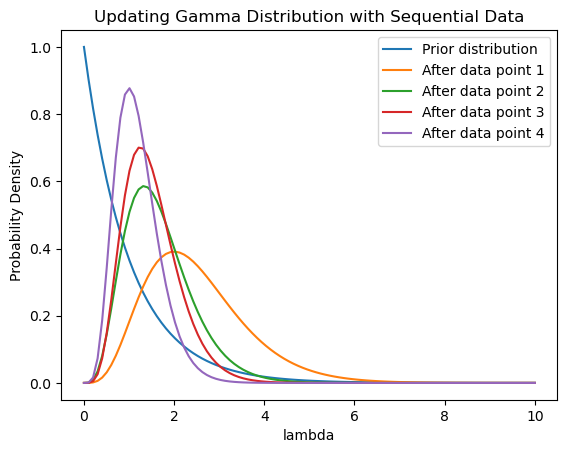

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def update_gamma_parameters(alpha, beta, data):
    return alpha + sum(data), beta + len(data)

# 初期パラメータ
alpha = 1
beta = 1

# 逐次的に与えられるデータの例 (ポアソン分布のデータ点)
data_stream = [4, 0, 1 , 0]

# パラメータと分布をプロットするための準備
x = np.linspace(0, 10, 100)

# 初期の事前分布をプロット
plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), label='Prior distribution')

# データポイントごとにパラメータを更新
for i, data_point in enumerate(data_stream):
    # 新しいデータ点でパラメータを更新
    alpha, beta = update_gamma_parameters(alpha, beta, [data_point])
    
    # 更新された分布をプロット
    plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), label=f'After data point {i+1}')

# グラフ表示設定
plt.title('Updating Gamma Distribution with Sequential Data')
plt.xlabel('lambda')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


## 解析的に難しい場合

### ラプラス近似
連続変数の集合上に定義されている確率変数関数に対して，ガウス分布による近似を見出すことを目的としています．

以下にラプラス近似の流れを説明します．

求めたい分布$p(\vec{x})$として
$$
p(\vec{x}) = \frac{1}{Z} f(\vec{x})
$$
と書けるとします．

まずはピークを見つけます．

つまり
$$
\frac{\partial p(\vec{x}_0)}{\partial \vec{x}} = 0
$$
を満たす$\vec{x}_0$を求めます．

次に，対数を取ってその$x_0$点周りでテイラー展開をします．
$$
\log p(\vec{x}) = \log p(\vec{x}_0) + \frac{1}{2}(\vec{x} - \vec{x}_0)^T \nabla \nabla \log p(\vec{x}_0) (\vec{x} - \vec{x}_0) + \cdots
$$

ここで，$\textbf{A} = - \nabla \nabla \log p(\vec{x}_0)$をヘッセ行列と定義します．

そのヘッセ行列を用いて以下のように近似をします．
$$
p(\vec{x}) \approx \frac{|\textbf{A}|^{1/2}}{2\pi^{M/2}} \exp \left( - \frac{1}{2} (\vec{x} - \vec{x}_0)^T \textbf{A} (\vec{x} - \vec{x}_0) \right)
$$


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 範囲を定義
x = np.linspace(-np.pi, np.pi, 1000)

# cos関数
f = np.cos(x)

# cos関数の導関数
def df(x):
    return -np.sin(x)

# cos関数の二階導関数
def ddf(x):
    return -np.cos(x)

In [11]:
# ラプラス近似
# x_0は最大値の点（cos関数の場合は0）
x_0 = 0
laplace_approximation = np.cos(x_0) + df(x_0) * (x - x_0) + 0.5 * ddf(x_0) * (x - x_0)**2

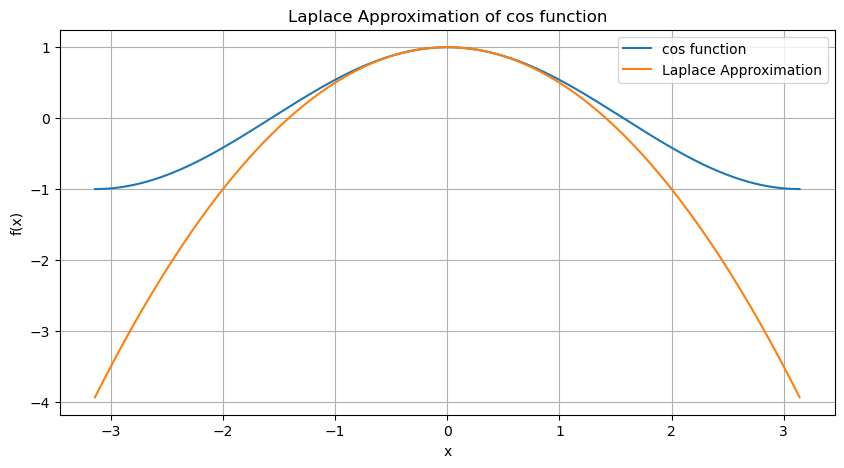

In [12]:
# グラフ描画
plt.figure(figsize=(10, 5))
plt.plot(x, f, label='cos function')
plt.plot(x, laplace_approximation, label='Laplace Approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Laplace Approximation of cos function')
plt.grid(True)
plt.show()

## サンプリング手法
### 逆関数法
生成したい分布関数の逆関数を用いて、一様分布からサンプリングする方法です．

### 棄却法
統計検定1級（理工学2022：問4）の問題を具体例にして，棄却法の説明をします．

#### 問題の概要
パラメータが$4,3$であるベータ分布のサンプリングを行いたいという問題です．

ベータ分布は逆関数法からは簡単にはサンプリングできないため，簡単にサンプリング可能な一様分布からの変換を考えます．

このような簡単にサンプリングが行えて，実際にサンプリングをするときに手伝ってくれる分布のことを，教科書では総じて提案分布と呼んでいます．
#### ベータ分布の形状
https://max999blog.com/python-beta-distribution-scipy/

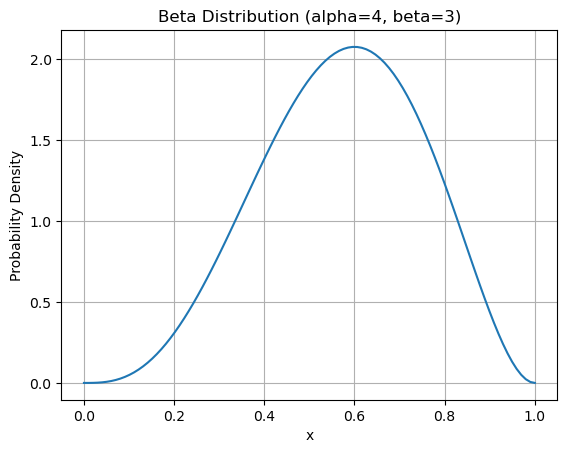

In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# パラメータ
alpha = 4
beta = 3

# ベータ分布を生成するためのパラメータ
beta_dist = stats.beta(alpha, beta)
ls = np.linspace(0, 1, 100)

# プロット
plt.plot(ls, beta_dist.pdf(ls)) # pdf : Probability density function.
plt.title('Beta Distribution (alpha=4, beta=3)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

独立な一様分布$Y , U$を使って確率変数を次のように定義します．
$$
X = Y \ \ \ (c_0 U \leq f(Y)) \\
\ \ \ -1\ \ \ \ (otherwise)
$$
ただし，$f(Y) = \dfrac{Y^{a-1}(1-Y)^{b-1}}{B(a,b)}$であり，$B(a,b)$はベータ関数です．

また，$c_0$は$f(Y)$の最大値を表します．(問1)

そして，$Pr[(c_0 U \leq f(Y))] = \dfrac{1}{c_0}$ということがわかっています．(問2)

実際に，この確率変数$X$はベータ分布に従うことがわかります．(問3)

### 棄却法のアルゴリズム
1. 提案分布からサンプリングを行う．
2. $c_0 U \leq f(Y)$を満たすかどうかを判定する．
3. 満たさない場合は，1に戻る．
4. 満たす場合は，$X = Y$として，$X$を採用する．
5. 1に戻る．   

1つのサンプルを得るためには，期待値的に$2c_0$個の一様乱数を発生させる必要があります．（問4）

In [15]:
c0 = beta_dist.pdf(0.6)

In [16]:
# お試し実装
u = np.random.uniform(0, 1)
y = np.random.uniform(0, 1)

left = c0 * u
right = beta_dist.pdf(y)

if c0 * u <= beta_dist.pdf(y):
    print(left)
    print(right)
    print('Accept')
else:
    print(left)
    print(right)
    print('Reject')

0.5737035678239208
1.2613819221811124
Accept


In [17]:
# 関数として定義
def rejection_sampling(c0 , n_samples=1000):
    samples = []
    for i in range(n_samples):
        u = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        left = c0 * u
        right = beta_dist.pdf(y)
        if c0 * u <= beta_dist.pdf(y):
            samples.append(y)
    return samples

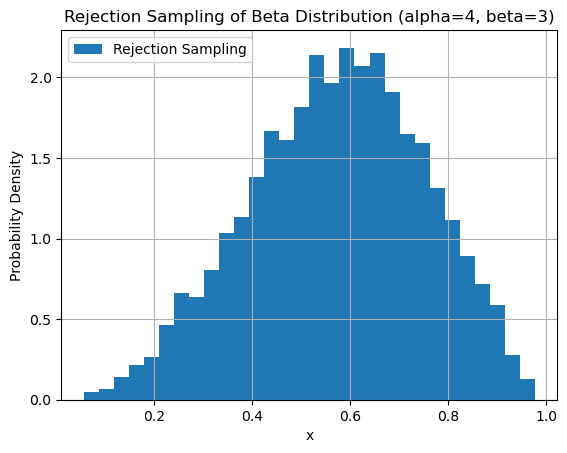

In [18]:
# サンプル数
n_samples = 10000

# 棄却サンプリングの実行
samples = rejection_sampling(c0 , n_samples)

# ヒストグラムのプロット
plt.hist(samples, bins=30, density=True, label='Rejection Sampling')
plt.title('Rejection Sampling of Beta Distribution (alpha=4, beta=3)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

採択される確率は$c_0^{-1}$であったので，確かめてみます．

In [19]:
1/c0 * n_samples

4822.530864197535

In [20]:
len(samples)

4870

### ボックス・マーラー変換
アクチュアリー数学2022問3

正規分布のサンプリング方法

逆関数法で正規分布をサンプリングすることはできません．

しかし，逆関数法で生成できる指数分布と，一様乱数の形状を変化させたものを組み合わせることで，正規分布をサンプリングすることができます．
$$
X = \sqrt{-2 \log U_1} \cos(2 \pi U_2) \\
Y = \sqrt{-2 \log U_1} \sin(2 \pi U_2)
$$

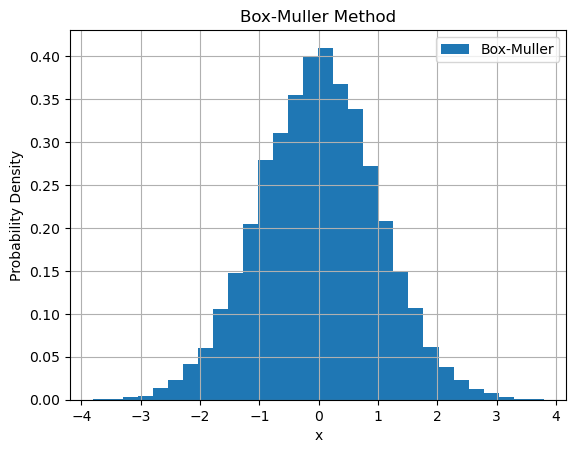

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# ボックス・マーラー法による正規乱数の生成
def box_muller(n_samples=1000):
    samples = []
    for i in range(n_samples):
        u1 = np.random.uniform(0, 1)
        u2 = np.random.uniform(0, 1)
        z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        samples.append(z1)
        samples.append(z2)
    return samples

# サンプル数
n_samples = 10000

# ボックス・マーラー法の実行
samples = box_muller(n_samples)

# ヒストグラムのプロット
plt.hist(samples, bins=30, density=True, label='Box-Muller')
plt.title('Box-Muller Method')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()